In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
# Parameters
Lx, Lz = 40,1
Nx, Nz = 1280, 32
Ra_M = 4.5e6
M_0 = 0
M_H = -1


Prandtl = 0.7
stop_sim_time = 2000

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5']


In [4]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
print(all_tot_ke[:10])
print(max(all_tot_ke))
"""
mean KE
"""
all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.average(mean_ke[t]))

[0.0, 2.9440144271935915e-08, 7.074092589022597e-08, 1.614590790900436e-07, 4.2588354449158266e-07, 1.488697044633349e-06, 5.0188944948218465e-06, 1.804855770966053e-05, 6.776802514670485e-05, 0.0003105420334336877]
0.5540238009818163


2000
2000


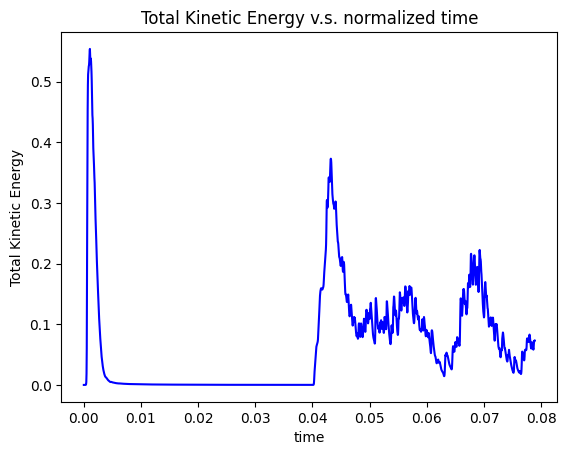

/state/partition1/job-46141149/ipykernel_3299627/439650040.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')


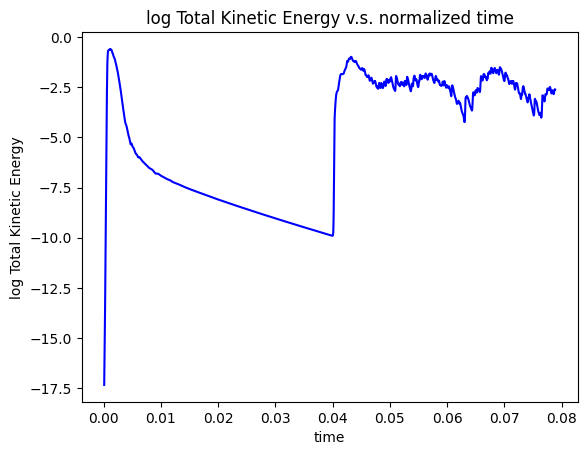

2000
2000


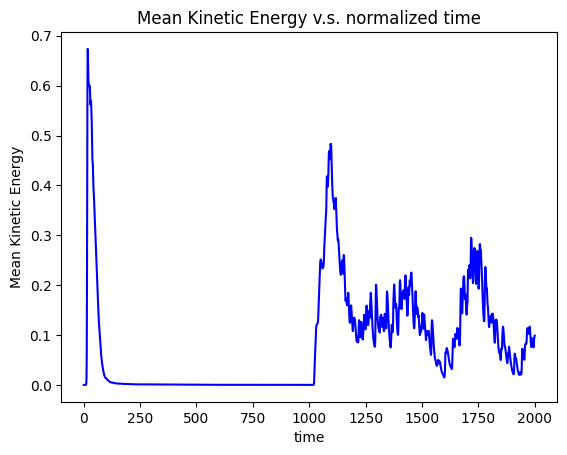

/state/partition1/job-46141149/ipykernel_3299627/439650040.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')


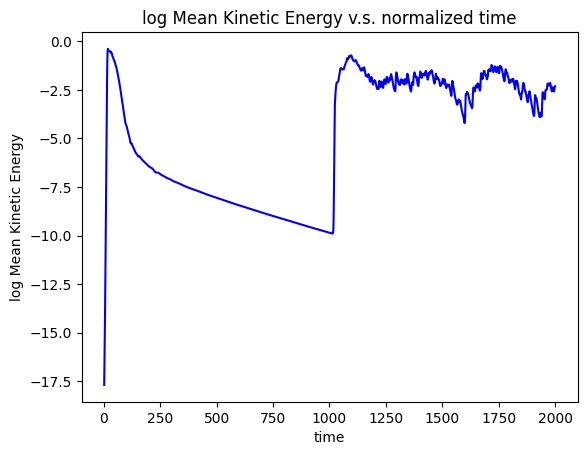

In [5]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
print(len(all_mean_ke))
figure_x_axis = np.array([x for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Mean Kinetic Energy v.s. normalized time')
plt.show()

In [6]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

2.9386457991198073e-11
-2.918908878239107e-10
-1.8255174753262476e-16


2000
2000


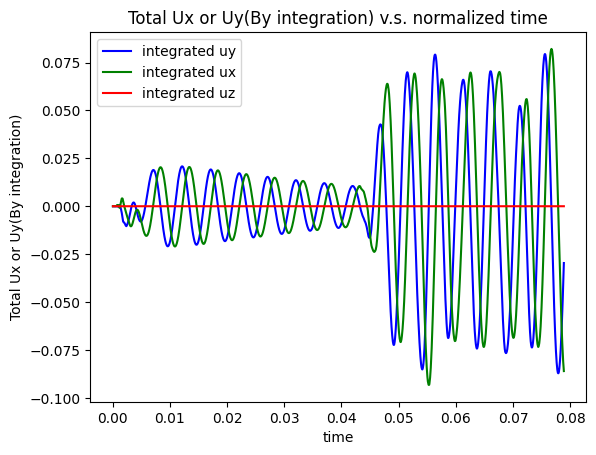

'\nI suspect that, because it is integrated, then total uz is always 0\n'

In [7]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(figure_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(figure_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()

"""
I suspect that, because it is integrated, then total uz is always 0
"""

In [8]:
all_tot_uy2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy2 = file['tasks']['ke by uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy2_each = uy2[t][0][0]
            all_tot_uy2.append(uy2_each)
print(all_tot_uy2[3])
all_tot_ux2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux2 = file['tasks']['ke by ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux2_each = ux2[t][0][0]
            all_tot_ux2.append(ux2_each)
print(all_tot_ux2[3])
all_tot_uz2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz2 = file['tasks']['ke by uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz2_each = uz2[t][0][0]
            all_tot_uz2.append(uz2_each)
print(all_tot_uz2[3])

1.4784219751091237e-10
3.367116569907753e-08
1.2764007119345517e-07


2000
2000


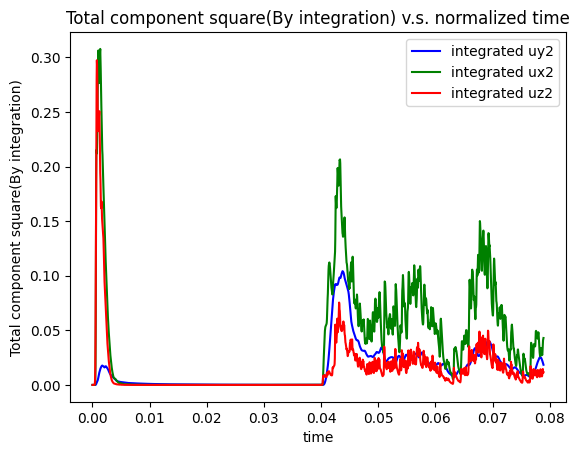

In [9]:
print(len(all_tot_uy2))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy2)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy2, color = 'blue', label='integrated uy2')
plt.plot(figure_x_axis, all_tot_ux2, color = 'green', label='integrated ux2')
plt.plot(figure_x_axis, all_tot_uz2, color = 'red', label='integrated uz2')
plt.xlabel('time')
plt.ylabel('Total component square(By integration)')
plt.title('Total component square(By integration) v.s. normalized time')
plt.legend()
plt.show()